## Данные из ДЗ-5

### Загрузка датасета из kaggle.com

In [3]:
!gdown --id 1XQWW7lsK0EiaibyDnSfQ1wKoZqdDZ2xu
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d yasserh/titanic-dataset
! unzip titanic-dataset.zip -d titanic-dataset

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1XQWW7lsK0EiaibyDnSfQ1wKoZqdDZ2xu
To: /content/kaggle.json
100% 73.0/73.0 [00:00<00:00, 356kB/s]
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 40.8MB/s]
Archive:  titanic-dataset.zip
  inflating: titanic-dataset/Titanic-Dataset.csv  


### Импорт библиотек и работа с датасетом

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/titanic-dataset/Titanic-Dataset.csv')

In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S


#### Определить количество пустых ячеек

In [7]:
# Количество пустых ячеек в каждом столбце
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Общее количество пустых ячеек
print(f'Общее количество пустых ячеек = {df.isnull().sum().sum()}')

Общее количество пустых ячеек = 866


#### Заполнение пустых ячеек

In [9]:
# В колонке Age, 177 пропущенных значений
# Зполним пропуски средним значением
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [10]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
330,331,1,3,"McCoy, Miss. Agnes",female,29.699118,2,0,367226,23.2500,NaN,Q
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.000000,0,2,315153,22.0250,NaN,S
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.000000,0,0,A/5. 10482,8.0500,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,29.699118,0,0,334912,7.7333,NaN,Q
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S


In [11]:
# В колонке Cabin больше всего пропущенных значений
# Проверим существует ли какая-то взаимосвязь между выживанием и тем, была ли у пассажира отдельная каюта
df['Survived'].groupby(df['Cabin'].isnull()).mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

 Пассажиры у кого запись отсутствует - выжили около 30%. А у кого запись о наличии каюты есть - выжило 67%, поэтому заменим значения в колонке Cabin категориальным признаком (0 - нет отдельной каюты, 1 - есть каюта)




In [12]:
df['Cabin'] = np.where(df['Cabin'].isnull(), 0,1)

In [13]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,0,Q
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,1,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,0,S
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,0,S
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,0,S


В колонке Embarked два пропущенных значения, заполним их наиболее часто встречаемым значением

In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Наиболее часто встречаемое значение "S"

In [15]:
df['Embarked'].replace(np.nan, 'S', inplace = True)

#### Аналитика

1. Количество уникальных значений

In [16]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin            2
Embarked         3
dtype: int64

2. Минимальное и максимальное значение

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [18]:
df.agg(['min','max'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
min,1,0,1,"Abbing, Mr. Anthony",female,0.42,0,0,110152,0.0000,0,C
max,891,1,3,"van Melkebeke, Mr. Philemon",male,80.00,8,6,WE/P 5735,512.3292,1,S




*   Количество пассажиров = 891
*   Всего 3 класса круиза
*   Возраст пассажиров от меньше 1 года до 80
*   Максимальное число братьев,сестер или супругов на борту у человека = 8
*   Максимальное число людей в семье (родители, дети) = 6
*   Максимальная цена билета = $512
*   Всего 3 порта посадки










3. Влияние всех признаков напризнак Survived

In [19]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Из 891 пассажиров выжили 342

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,C


In [21]:
surv = df.groupby(df['Name'].str.split(r'[,.]').str[1])
surv['Survived'].mean()

Name
 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.697802
 Mlle            1.000000
 Mme             1.000000
 Mr              0.156673
 Mrs             0.792000
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64

Среднее значение выживших в зависимости от приставки в имени. Например Sir, Lady люди из высокого класса выжили в 100%

In [22]:
df.groupby(['Pclass','Sex'])['Survived'].mean().unstack(level=1)

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


В каждом классе доля выживших женщин больше чем мужчин

In [23]:
# Средний возраст выживших в каждом классе
s = df[df['Survived'] == 1]
pd.pivot_table(s, values='Age', index='Pclass', columns='Sex', aggfunc='mean').round()

Sex,female,male
Pclass,,
1,34.0,36.0
2,28.0,18.0
3,23.0,24.0


In [24]:
pd.pivot_table(df, index='SibSp', columns='Survived', values='PassengerId', aggfunc='count')

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


In [25]:
pd.pivot_table(df, index='Parch', columns='Survived', values='PassengerId', aggfunc='count')

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


У пассажиров без семьи или с количеством людей в семье (родители, дети, родственники) до 2 было больше шансов на выживание.

# Домашнее задание №6

In [1]:
import matplotlib.pyplot as plt

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


Text(0.5, 1.0, 'Число выживших и погибших')

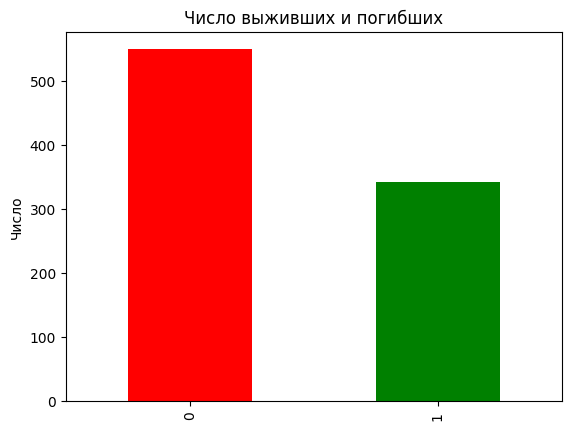

In [34]:
# Число выживших и погибших
df.Survived.value_counts().plot(kind = "bar", color=['r', 'g'])
plt.ylabel("Число")
plt.title("Число выживших и погибших")

Text(0.5, 1.0, 'Процент мужчин и женщин на борту')

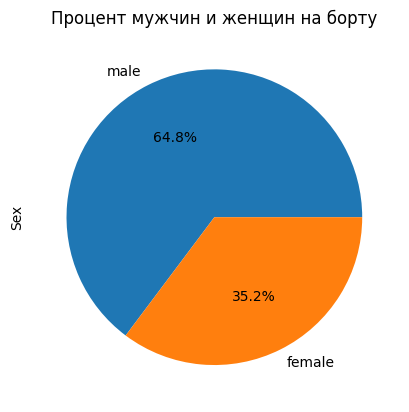

In [36]:
# Процент мужчин и женщин
df.Sex.value_counts().plot(kind = "pie", autopct='%1.1f%%');
plt.title("Процент мужчин и женщин на борту")

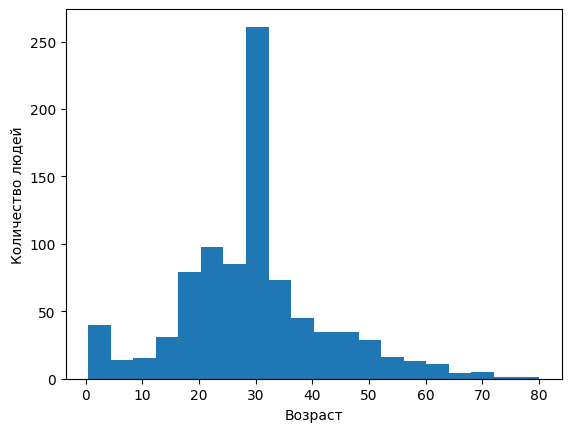

In [37]:
# Количество людей от возраста
fig, ax = plt.subplots()
ax.hist(df.Age, bins = 20)
ax.set_xlabel("Возраст")
ax.set_ylabel("Количество людей")
plt.show()

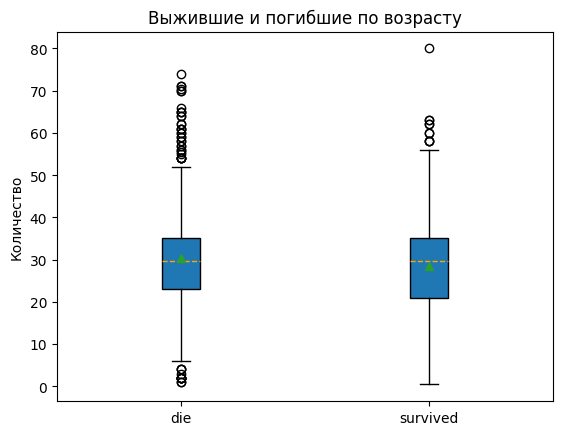

In [30]:
# Возрастное распределение выживших и погибших пассажиров
survived_s = []
fares = []
# Удалить данные строки, возраст которых равен NaN
for survived, items in df.groupby('Survived'):
    survived_s.append(survived)
    fares.append(items['Age'])
str_sur = ['die', 'survived']
plt.ylabel("Количество")
plt.title("Выжившие и погибшие по возрасту")
plt.boxplot(x=fares, patch_artist=True, labels=str_sur, showmeans=True,
            medianprops={'linestyle': '--', 'color': 'orange'})
plt.show()

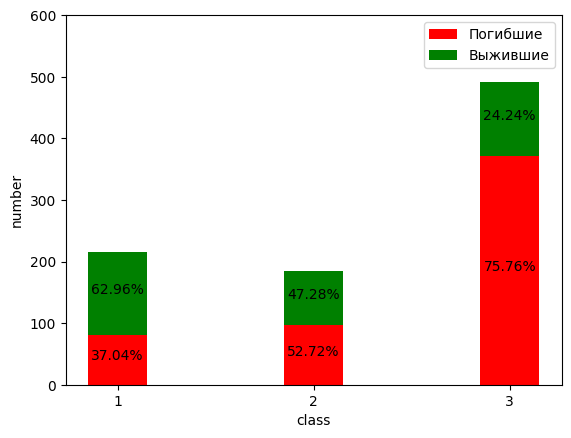

In [38]:
# Количество погибших и выживших в салонах разных классов
classes = []
survived_s = [[], []]
for pclass, items in df.groupby('Pclass'):
    classes.append(pclass)
    count0 = items[items['Survived'] == 0]['Survived'].count()
    count1 = items[items['Survived'] == 1]['Survived'].count()
    survived_s[0].append(count0)
    survived_s[1].append(count1)

plt.bar(classes, survived_s[0], color='r', width=0.3)
plt.bar(classes, survived_s[1], bottom=survived_s[0], color='g', width=0.3)

for i, pclass in enumerate(classes):
    totals = survived_s[0][i] + survived_s[1][i]
    plt.text(pclass, survived_s[0][i] // 2, '%.2f%%' % ((survived_s[0][i]) / totals * 100), ha='center')
    plt.text(pclass, survived_s[0][i] + survived_s[1][i] // 2, '%.2f%%' % ((survived_s[1][i]) / totals * 100),
             ha='center')

plt.xticks(classes, classes)
plt.ylim([0, 600])
plt.legend(['Погибшие', 'Выжившие'], loc='upper right')
plt.xlabel("class")
plt.ylabel("number")

plt.show()

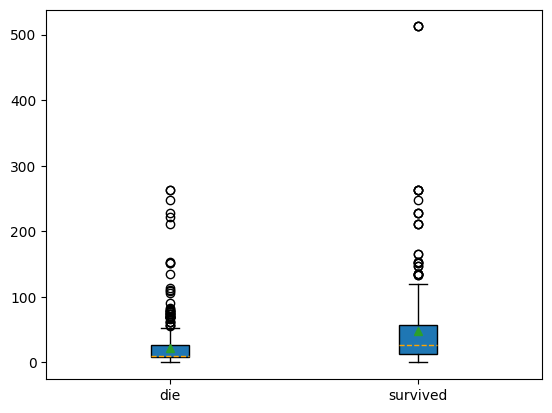

In [32]:
# Распределение тарифов для выживших и погибших пассажиров
survived_s = []
fares = []
for survived, item in df.groupby('Survived'):
    # print(survived)
    survived_s.append(survived)
    fares.append(item['Fare'])
str_sur = ['die', 'survived']
plt.boxplot(x=fares, patch_artist=True, labels=str_sur, showmeans=True,
            medianprops={'linestyle': '--', 'color': 'orange'})
plt.show()

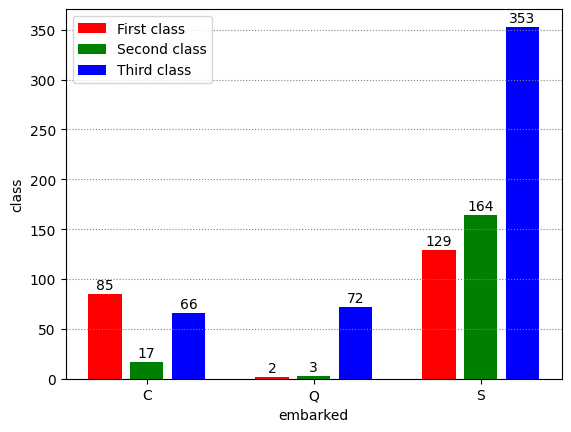

In [33]:
# Распределение уровней пассажирского салона в разных портах посадки
embarkeds = []
pclasses = []
for embarked, items in df.groupby('Embarked'):
    embarkeds.append(embarked)
    p_class_s = []
    for p_class, values in items.groupby('Pclass'):
        p_class_s.append(values['Pclass'].count())
    pclasses.append(p_class_s)

x = np.array(range(len(embarkeds)))
plt.bar(x - 0.25, [i[0] for i in pclasses], width=0.2, color='r')
plt.bar(x, [i[1] for i in pclasses], width=0.2, color='g')
plt.bar(x + 0.25, [i[2] for i in pclasses], width=0.2, color='b')

for i, val in enumerate(x):
    item = pclasses[i]
    plt.text(val - 0.25, item[0] + 5, '%s' % item[0], ha='center')
    plt.text(val, item[1] + 5, '%s' % item[1], ha='center')
    plt.text(val + 0.25, item[2] + 5, '%s' % item[2], ha='center')
plt.xticks(x, embarkeds)
plt.legend(['First class', 'Second class', 'Third class'])
plt.grid(axis='y', color='gray', linestyle=':')
plt.xlabel("embarked")
plt.ylabel("class")
plt.show()